# Random Forest Regression

## Importing the libraries

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import xarray as xr

In [ ]:
# Mounting gDrive to access dataset
from google.colab import drive
drive.mount('/content/drive')

## Importing the dataset

In [88]:
# dataset = pd.read_csv('/content/drive/My Drive/DS-Solar/DS_G33_Solar.csv')
dataset = xr.open_mfdataset('/content/drive/My Drive/DS-Solar/test/*.nc', parallel=True)
df = dataset.to_dataframe().reset_index()

In [89]:
# df = dataset
d = df.loc[(df['ens'] == 0) & (df['lat'] == 31) & (df['lon'] == 254) ] # selecting 1 ensemble and 1 location
# d['DateTime'] = d['intValidTime'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H')) # adding formated date time
d['DateTime'] = pd.to_datetime(d['intValidTime'], format='%Y%m%d%H')
d = d[['DateTime'] + [x for x in d if x not in ['DateTime']]] # moving DateTime col to beginning
d = d.drop(['ens', 'fhour', 'lat', 'lon', 'time', 'intTime', 'intValidTime'], axis = 1) # removing all metadata cols after selection
d = d.sort_values('DateTime') # sorting by Date Time
d = d.reset_index().drop(['index'], axis = 1) # removing old index
d['Net_Downward_Rad_Flux'] = np.sum(d[['Downward_Short-Wave_Rad_Flux', 'Downward_Long-Wave_Rad_Flux']], 
                            axis=1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
X = d.iloc[:, 3:-1].values
y = d.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Predicting the Test set results

In [93]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1243.15 1239.  ]
 [ 430.11  422.  ]
 [1410.27 1405.53]
 ...
 [1173.74 1204.  ]
 [ 592.85  599.  ]
 [ 401.95  394.  ]]


In [94]:
display(y_test.shape)
display(y_pred.shape)

(1796,)

(1796,)

## Evaluating the Model Performance

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.997689943070813

In [96]:
from sklearn.metrics import mean_squared_error
# compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 17.660345


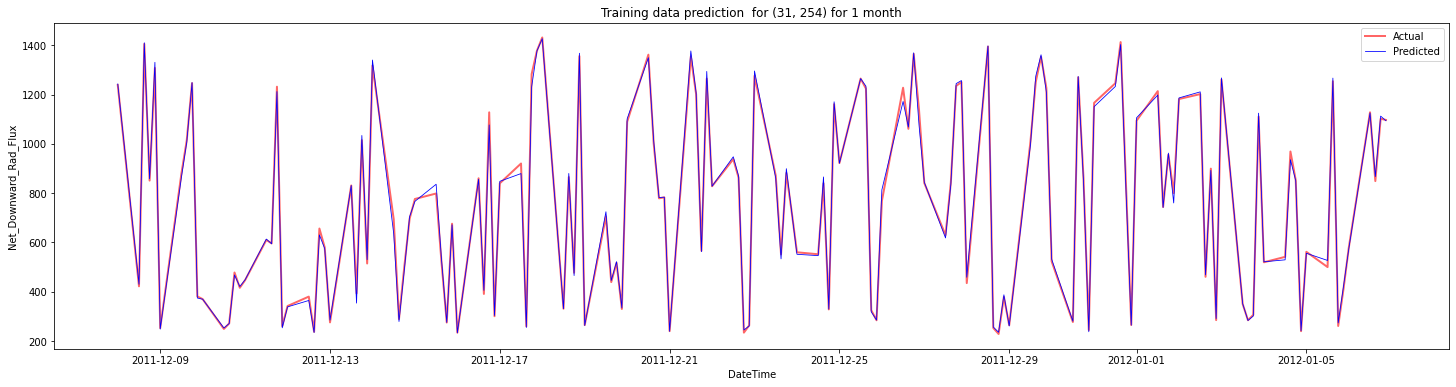

In [98]:
DateTime = d['DateTime'].iloc[ 7184:7334]
# DateTime.shape
y_test_vis = y_test[:150]
y_pred_vis = y_pred[:150]
plt.figure(figsize=(25,6))
plt.plot(DateTime, y_test_vis, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(DateTime, y_pred_vis, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('DateTime')
plt.ylabel('Net_Downward_Rad_Flux')
plt.title("Training data prediction  for (31, 254) for 1 month")
plt.show()